# Walmart Sales Prediction By using Machine Learning 

                                                                      ----Mangesh Pawar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [1]:
df=pd.read_csv("Walmart (1).csv" )

NameError: name 'pd' is not defined

# EDA

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.shape   #shape of dataset there is 6435 rows and 8 columns 


(6435, 8)

In [5]:
df['Date'].unique()

array(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010',
       '05-03-2010', '12-03-2010', '19-03-2010', '26-03-2010',
       '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010',
       '30-04-2010', '07-05-2010', '14-05-2010', '21-05-2010',
       '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010',
       '25-06-2010', '02-07-2010', '09-07-2010', '16-07-2010',
       '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
       '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010',
       '17-09-2010', '24-09-2010', '01-10-2010', '08-10-2010',
       '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010',
       '12-11-2010', '19-11-2010', '26-11-2010', '03-12-2010',
       '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010',
       '07-01-2011', '14-01-2011', '21-01-2011', '28-01-2011',
       '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
       '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011',
       '01-04-2011', '08-04-2011', '15-04-2011', '22-04

In [6]:
df.columns   #check for columns 

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
df.dtypes  #check for datatypes present in dataset there is two type of data int and float no object data found

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [8]:
df.isnull().sum()  #check for null value present in dataset 

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df['Store'].unique()  # check for how much stores are present 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [10]:
df.describe()  #statisctical analysis 

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# Anomaly Detection


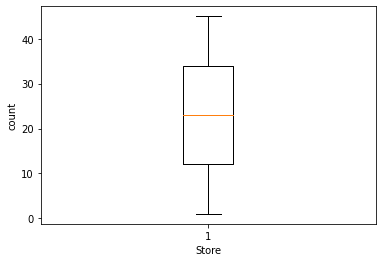

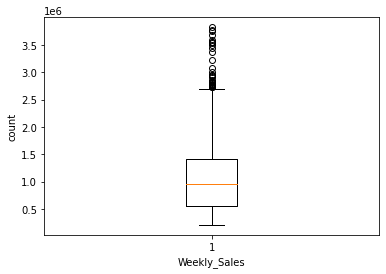

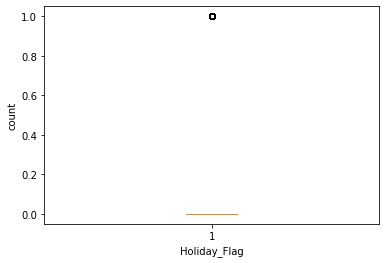

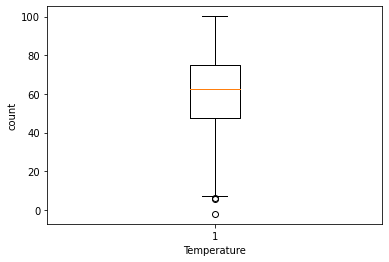

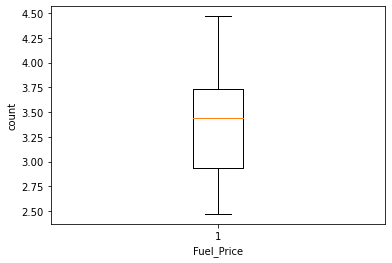

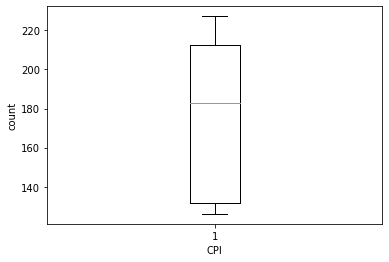

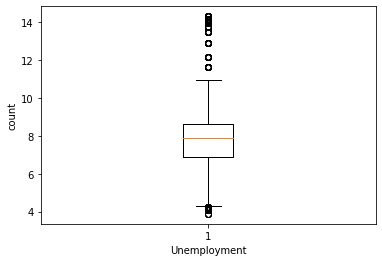

In [11]:
for col_name in df.columns:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [12]:
#as we see there are outliers in unemployment , tempreture and Weekly_sales columsn 

# Removing outliers

In [13]:
df.columns   #check for columns 

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [14]:
def remove_outliers(df,columnName):     #function to delete outliers
  q1=np.percentile(df[columnName],0.25)
  q3=np.percentile(df[columnName],0.75)
  IQR=q3-q1 # inter quartile range 
  UL = q3+1.5* q3  #upper limit
  LL=q1-1.5*q1 # lower limit 
  df =df[(df[columnName] > LL) & (df[columnName] < UL)]
  return df

In [15]:
df=remove_outliers(df,'Unemployment')

<AxesSubplot:xlabel='Unemployment'>

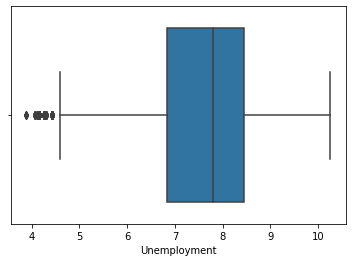

In [16]:
sns.boxplot(df['Unemployment']) # Unemployment after removing outliers 

In [17]:
df=remove_outliers(df,'Weekly_Sales')

<AxesSubplot:xlabel='Weekly_Sales'>

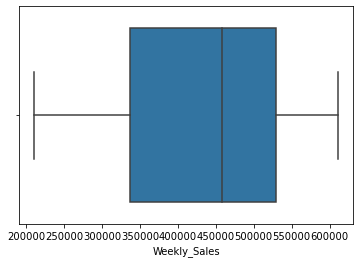

In [18]:
sns.boxplot(df['Weekly_Sales'])    # Weekly_sales after removing outliers 

# Check Multicollinearity

<AxesSubplot:>

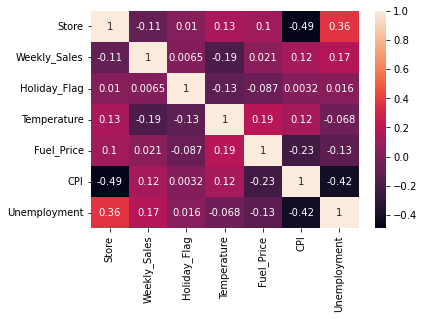

In [19]:
sns.heatmap(df.corr(),annot=True)

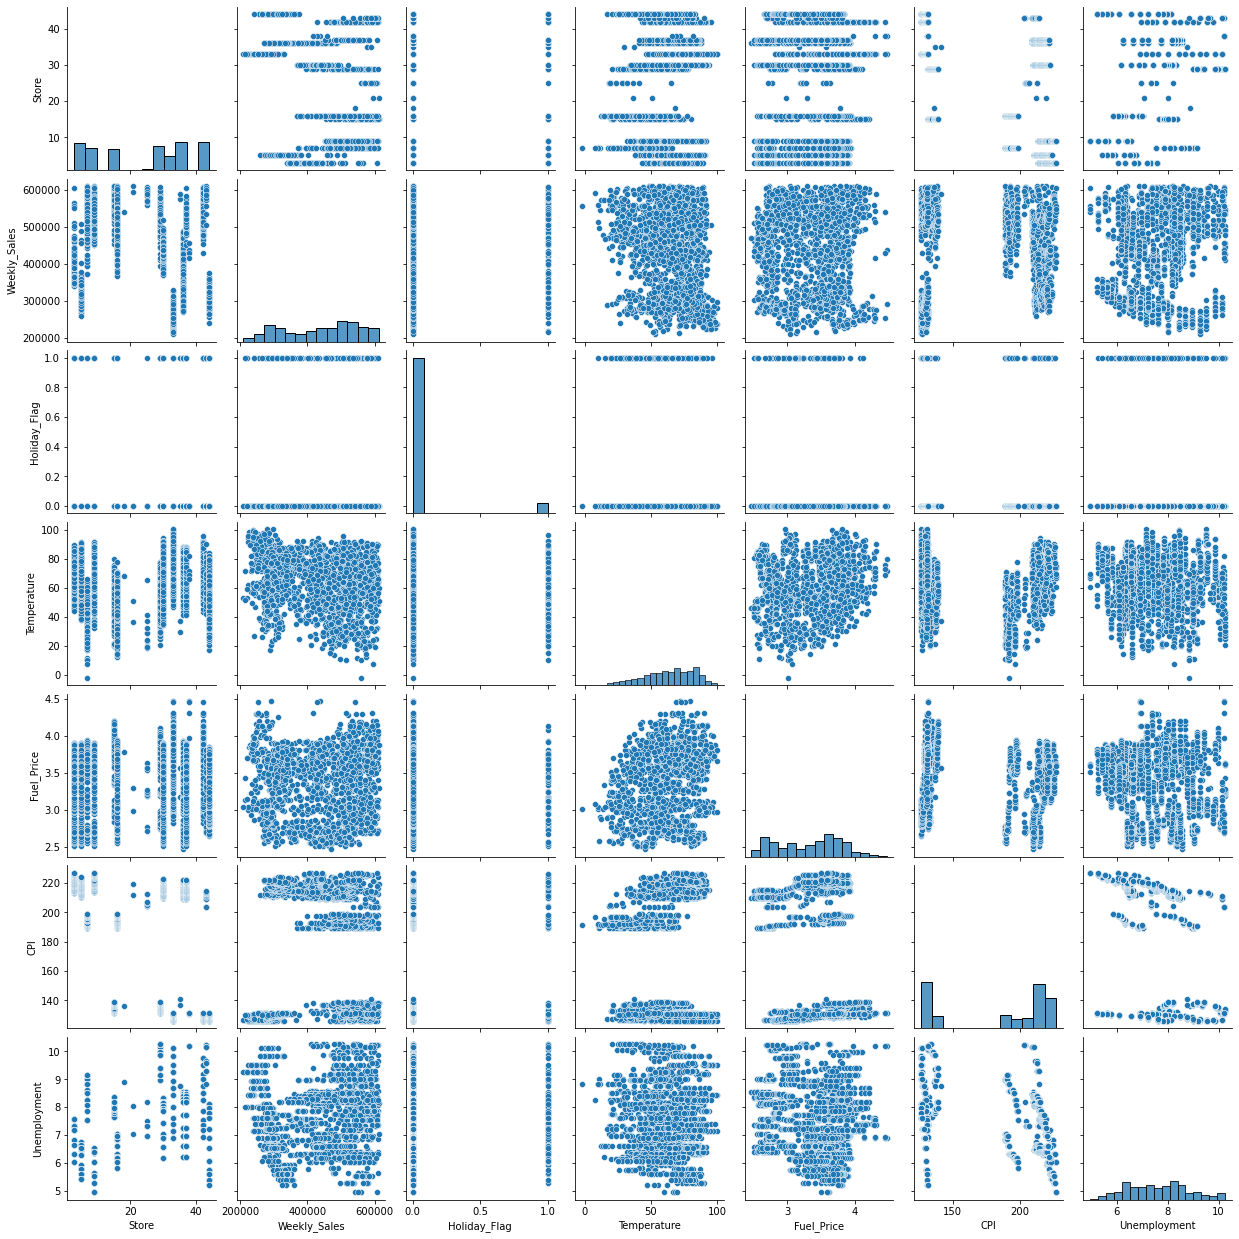

In [20]:
sns.pairplot(df)

Now in next step we spereat date in  month , week and year and check insights 

In [21]:
def extract_week(df):
  Date ='Date'
  df[Date]=pd.to_datetime(df[Date],infer_datetime_format=True)
  df['week'] = pd.DatetimeIndex(df[Date]).week
  df['month'] = pd.DatetimeIndex(df[Date]).month
  df['year'] = pd.DatetimeIndex(df[Date]).year

In [22]:
extract_week(df)

In [23]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
286,3,2010-05-02,461622.22,0,45.71,2.572,214.424881,7.368,17,5,2010
287,3,2010-12-02,420728.96,1,47.93,2.548,214.574792,7.368,48,12,2010
288,3,2010-02-19,421642.19,0,47.07,2.514,214.619887,7.368,7,2,2010
289,3,2010-02-26,407204.86,0,52.05,2.561,214.647513,7.368,8,2,2010
290,3,2010-05-03,415202.04,0,53.04,2.625,214.675139,7.368,18,5,2010


In [24]:
 df.drop(['Date'], inplace=True,axis=1)

In [25]:
df['year'].value_counts()

2011    627
2010    563
2012    537
Name: year, dtype: int64

In [26]:
df['month'].value_counts()

4     177
5     163
10    162
9     159
7     155
3     149
8     141
2     135
1     133
6     130
12    120
11    103
Name: month, dtype: int64

# Plot the relationship between columns

## Fuel_price vs Year

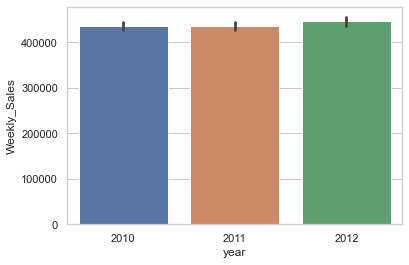

In [27]:

sns.set_theme(style="whitegrid")
 
ax = sns.barplot(x="year", y="Weekly_Sales", data=df)
sns.set(rc = {'figure.figsize':(10,4)})

Insights : Sales is not effected by fuel price


# Store Vs Sales

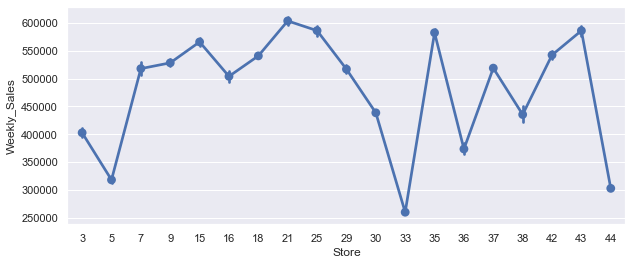

In [28]:
sns.pointplot(x ='Store', y = "Weekly_Sales", data = df)
# show the plot
sns.set(rc = {'figure.figsize':(25,8)})
plt.show()

insights : weekly sales of store 35 is high more than 35K, Different stores have different sales


# Sales vs Month

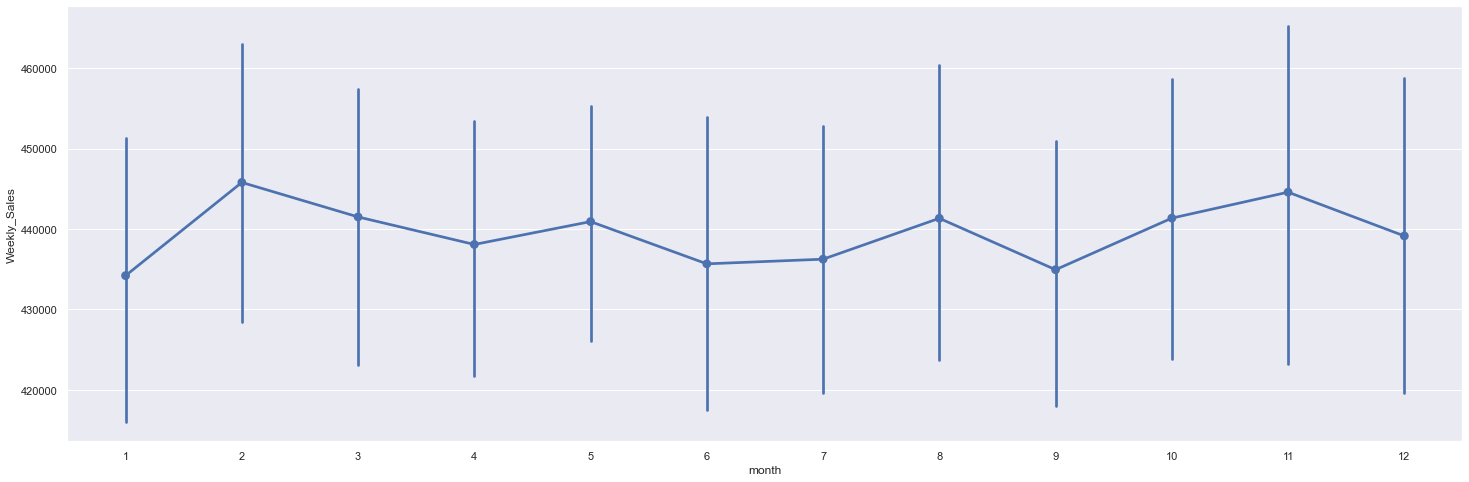

In [29]:
sns.pointplot(x ='month', y = "Weekly_Sales", data = df)
# show the plot
sns.set(rc = {'figure.figsize':(25,8)})
plt.show()

Insights : in Febuary and November sales are high , and low in August 

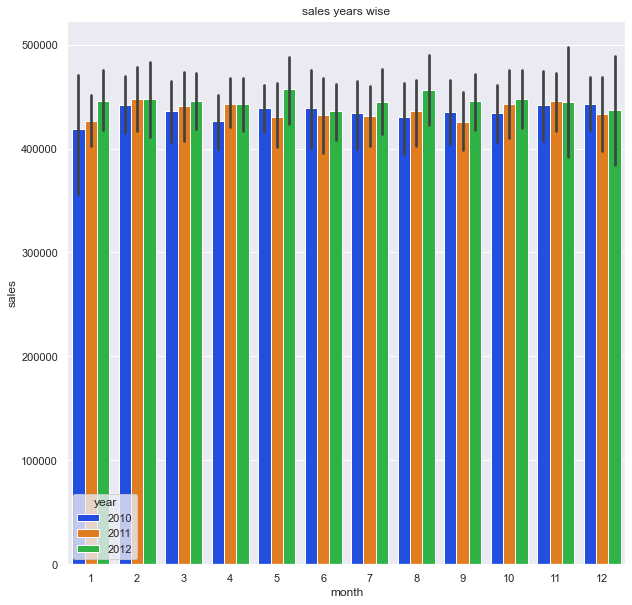

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='month',y='Weekly_Sales',hue='year',palette='bright')
plt.title('sales years wise')
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

 Insights : vary less variation in sales with respect to years 

<AxesSubplot:xlabel='month'>

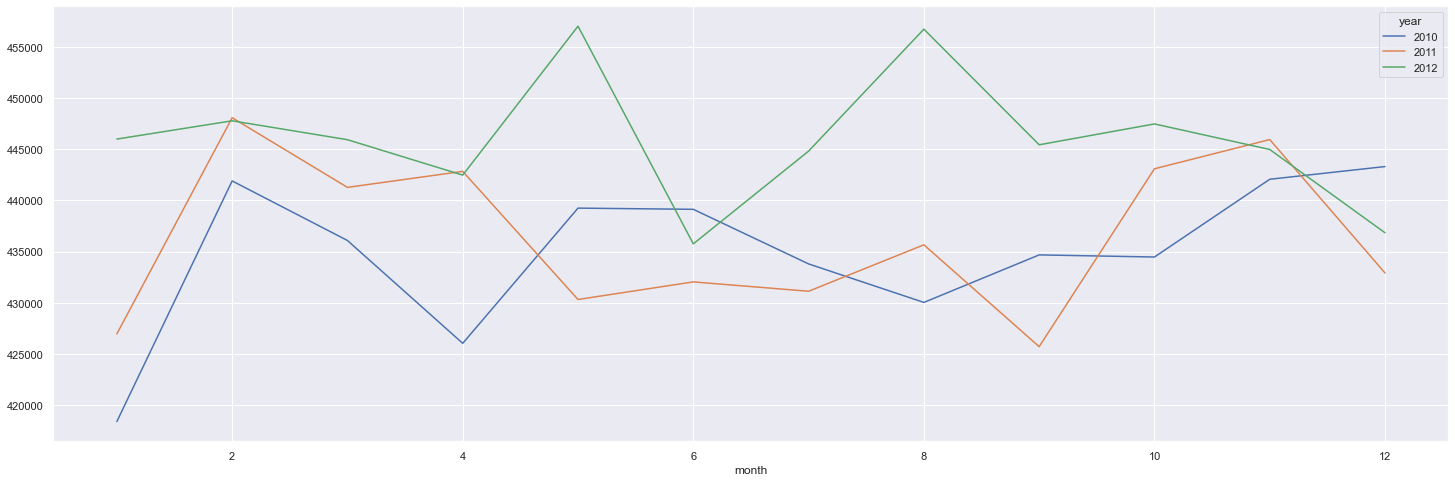

In [31]:
month_wise_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
month_wise_sales.plot()

# Tempreture Vs Sales

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

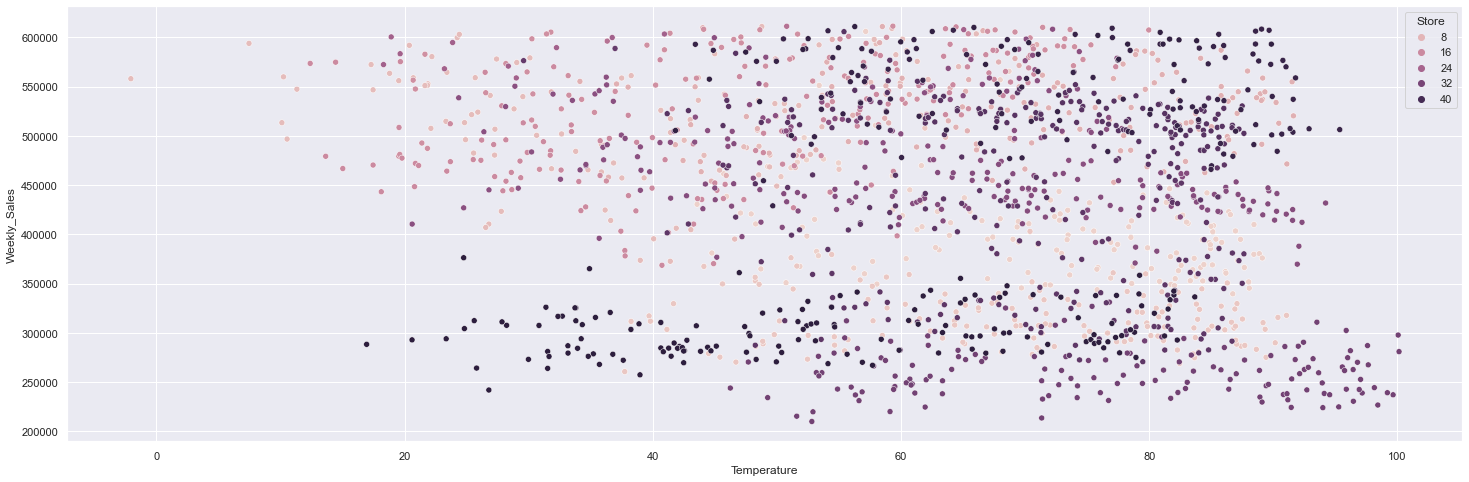

In [32]:
sns.scatterplot(data=df,x='Temperature',y='Weekly_Sales',hue='Store')

Insights : sales doesnot depend upon temperature 

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

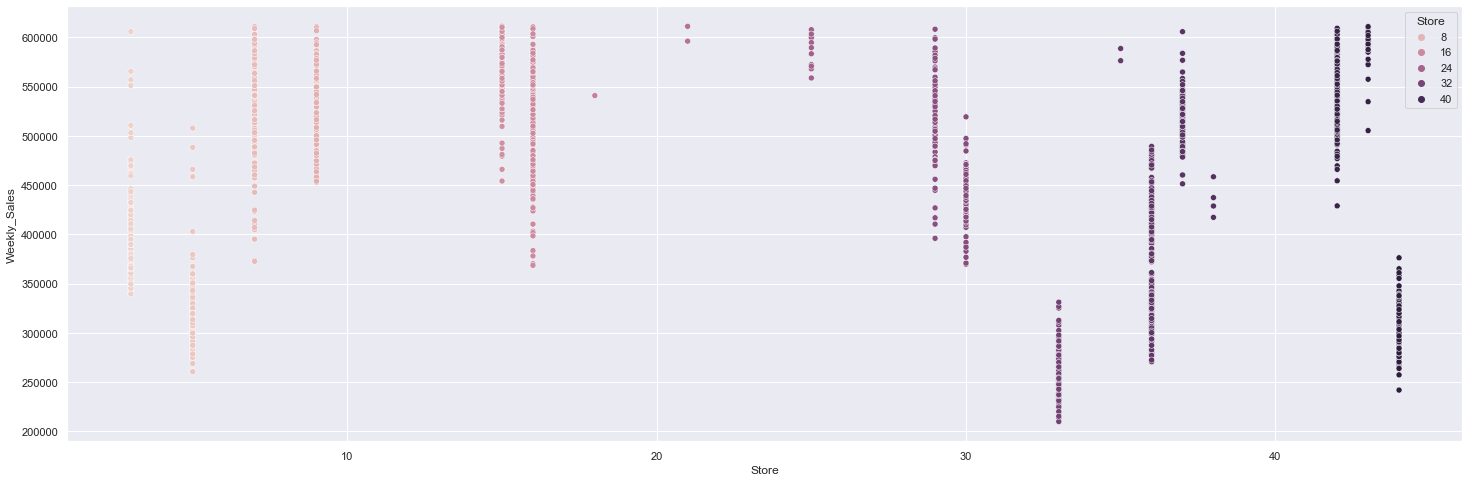

In [33]:
sns.scatterplot(data=df,x='Store',y='Weekly_Sales',hue='Store')

insights : different stores have different no of sales

# Feature Importance Test using various techniques

In [80]:
x = df[['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','week', 'month', 'year']]
y = df['Weekly_Sales']

In [59]:
x.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
286,3,0,45.71,2.572,214.424881,7.368,17,5,2010
287,3,1,47.93,2.548,214.574792,7.368,48,12,2010
288,3,0,47.07,2.514,214.619887,7.368,7,2,2010
289,3,0,52.05,2.561,214.647513,7.368,8,2,2010
290,3,0,53.04,2.625,214.675139,7.368,18,5,2010


In [81]:
y


286     461622.22
287     420728.96
288     421642.19
289     407204.86
290     415202.04
          ...    
6287    355307.94
6288    337390.44
6289    337796.13
6290    323766.77
6291    361067.07
Name: Weekly_Sales, Length: 1727, dtype: float64

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X,y)

RandomForestRegressor()

In [84]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [87]:
DTRmodel = DecisionTreeRegressor(max_depth=15,random_state=0)
DTRmodel.fit(x_train,y_train)
y_pred = DTRmodel.predict(x_test)

In [88]:
print("R2 score  :",r2_score(y_test, y_pred)*100)
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy:',DTRmodel.score(x_test, y_test)*100)

R2 score  : 86.31793590446773
MSE score  : 1561172100.4233441
RMSE:  39511.6704332194
Accuracy: 86.31793590446773


In [89]:
rf1 = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=5, max_depth=15)
rf1.fit(x_train,y_train)
y_pred1 = rf1.predict(x_test)

In [90]:
print("R2 score  :",r2_score(y_test, y_pred)*100)
print("MSE score  :",mean_squared_error(y_test, y_pred1))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred1)))
print('Accuracy:',rf1.score(x_test, y_test)*100)

R2 score  : 86.31793590446773
MSE score  : 874050364.4310127
RMSE:  29564.342787063822
Accuracy: 92.33984958761076


## Accuracy =  92.34%

In [95]:
x.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
286,3,0,45.71,2.572,214.424881,7.368,17,5,2010
287,3,1,47.93,2.548,214.574792,7.368,48,12,2010
288,3,0,47.07,2.514,214.619887,7.368,7,2,2010
289,3,0,52.05,2.561,214.647513,7.368,8,2,2010
290,3,0,53.04,2.625,214.675139,7.368,18,5,2010


In [99]:
user_input = [[3,0,45.71,2.572,214.4,7.3,11,1,2013]]
user_preds = rf1.predict(user_input)
user_preds

array([419835.99408])

In [97]:
user_input = [[2,0,60.66,3.35,171.57,7.99,11,1,2013]]
user_preds = rf1.predict(user_input)
user_preds

array([396717.0764])

## So, we got 92.39% accuracy by using Decision Tree Model.